In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np
from kats.consts import TimeSeriesData
from kats.utils.decomposition import TimeSeriesDecomposition
from kats.models.linear_model import LinearModel, LinearModelParams

c:\Users\William\anaconda3\envs\Springboard_Capstone_2_kats2\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
raw = pd.read_csv('E:\\OtherCodeProjects\\Springboard Capstone Projects\\Springboard-Capstone-2-Data\\Niger_food_prices.csv')
raw.head()

date    days  Maize - Retail  Rice (imported) - Retail  \
0  1990-01-01  7305.0             NaN                201.666667   
1  1990-02-01  7336.0             NaN                201.666667   
2  1990-03-01  7364.0             NaN                201.666667   
3  1990-04-01  7395.0             NaN                202.333333   
4  1990-05-01  7425.0             NaN                202.333333   

   Sorghum - Retail  Millet - Retail  Beans (niebe) - Retail  
0         57.750000            61.00                     NaN  
1         54.250000            63.40                     NaN  
2         54.750000            65.20                     NaN  
3         55.500000            69.60                     NaN  
4         49.666667            63.25                     NaN

In [3]:
df = raw.rename(columns={'date':'time'})
df.head()

time    days  Maize - Retail  Rice (imported) - Retail  \
0  1990-01-01  7305.0             NaN                201.666667   
1  1990-02-01  7336.0             NaN                201.666667   
2  1990-03-01  7364.0             NaN                201.666667   
3  1990-04-01  7395.0             NaN                202.333333   
4  1990-05-01  7425.0             NaN                202.333333   

   Sorghum - Retail  Millet - Retail  Beans (niebe) - Retail  
0         57.750000            61.00                     NaN  
1         54.250000            63.40                     NaN  
2         54.750000            65.20                     NaN  
3         55.500000            69.60                     NaN  
4         49.666667            63.25                     NaN

In [4]:
millet_df = df[['time', 'Millet - Retail']]
millet_ts = TimeSeriesData(millet_df)
millet_ts

time  Millet - Retail
0   1990-01-01        61.000000
1   1990-02-01        63.400000
2   1990-03-01        65.200000
3   1990-04-01        69.600000
4   1990-05-01        63.250000
..         ...              ...
374 2021-03-01       256.319149
375 2021-04-01       269.528302
376 2021-05-01       277.320755
377 2021-06-01       282.113208
378 2021-07-01       293.961538

[379 rows x 2 columns]

<Axes: xlabel='time'>

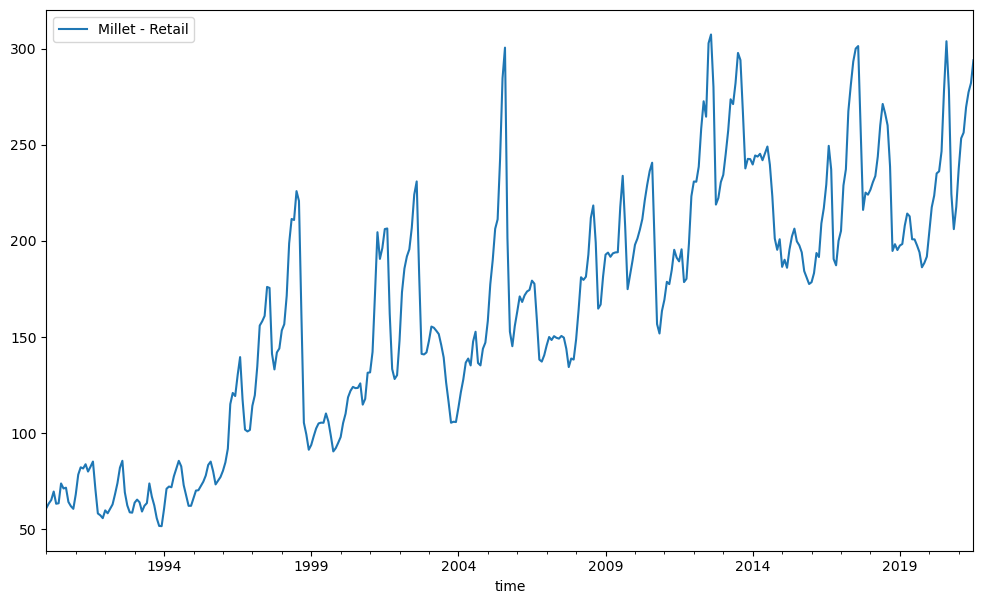

In [5]:
millet_ts.plot()

(<Axes: title={'center': 'Trend'}>,
 <Axes: title={'center': 'Seasonality'}>,
 <Axes: title={'center': 'Residual'}>,
 <Axes: xlabel='Time'>)

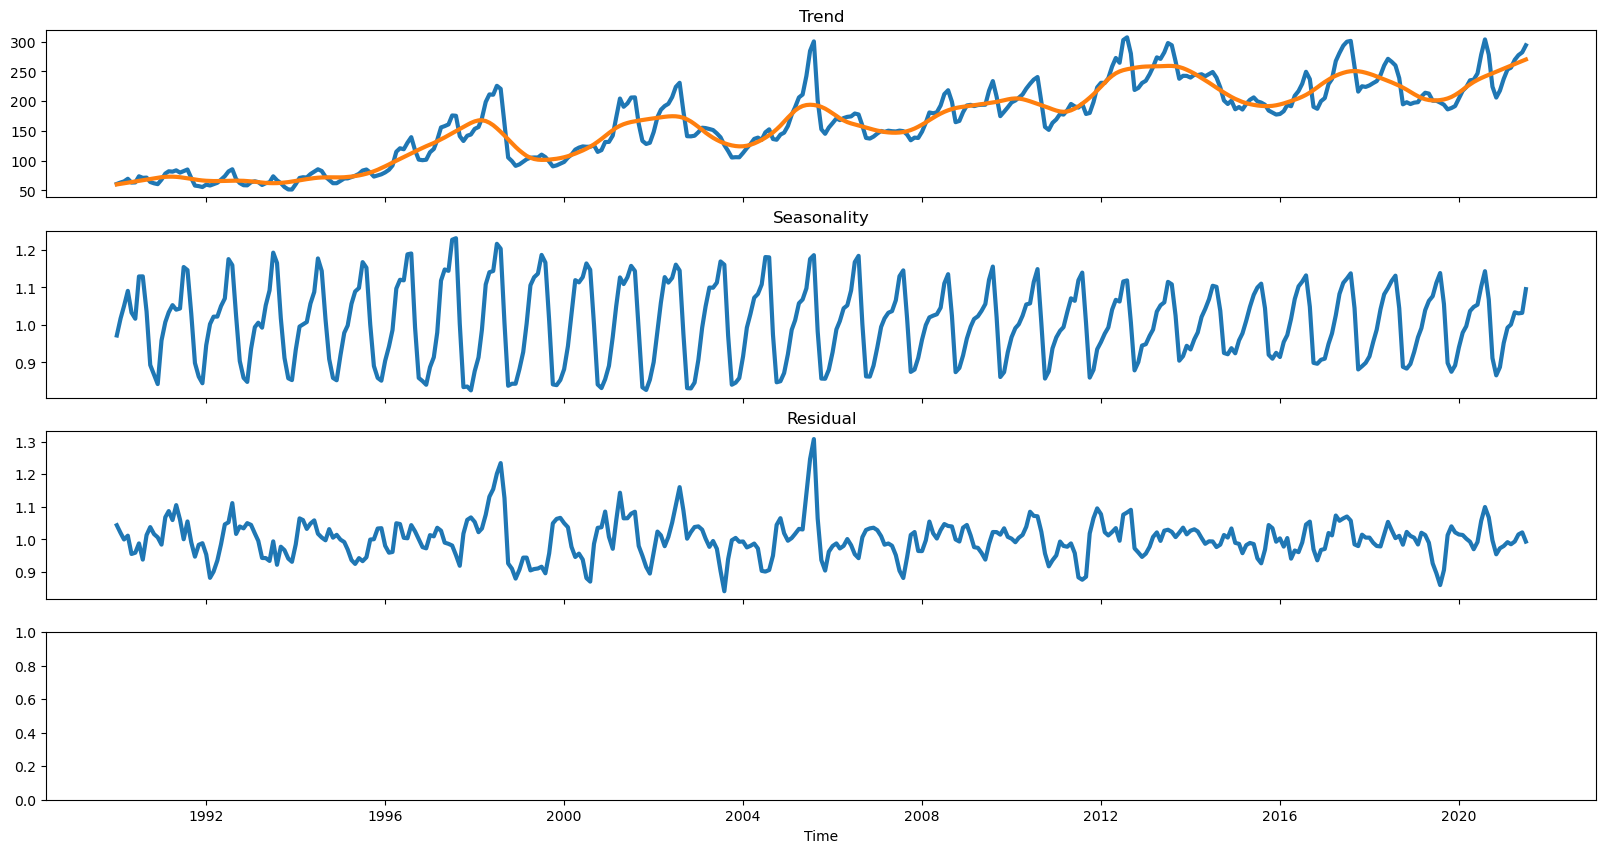

In [6]:
decompose = TimeSeriesDecomposition(millet_ts, decomposition='multiplicative', method='STL decompostion')
_ = decompose.decomposer()
decompose.plot()

In [7]:
params = LinearModelParams()

m = LinearModel(millet_ts, params)
m.fit()

pred = m.predict(steps=24, include_history=True)

<Axes: xlabel='time', ylabel='y'>

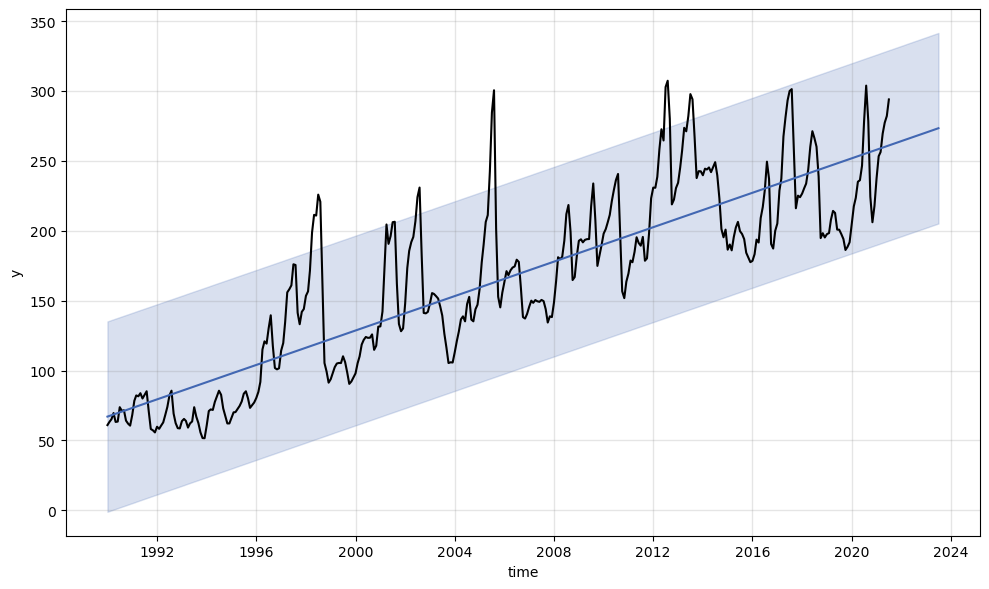

In [8]:
m.plot()